In [78]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('../data/heart_disease.csv')
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholerstoral,FastingBloodSugar,restecg,MaxHeartRate,ExInducedAngina,oldpeak,slope,MajorVessels,ThaliumStressResult,target
0,0.948726,1.0,1.0,0.757525,-0.264900,1.0,2.0,0.017197,0.0,1.087338,3.0,0.0,6.0,0
1,1.392002,1.0,4.0,1.611220,0.760415,0.0,2.0,-1.821905,1.0,0.397182,2.0,3.0,3.0,2
2,1.392002,1.0,4.0,-0.665300,-0.342283,0.0,2.0,-0.902354,1.0,1.346147,2.0,2.0,7.0,1
3,-1.932564,1.0,3.0,-0.096170,0.063974,0.0,0.0,1.637359,0.0,2.122573,3.0,0.0,3.0,0
4,-1.489288,0.0,2.0,-0.096170,-0.825922,0.0,2.0,0.980537,0.0,0.310912,1.0,0.0,3.0,0


In [80]:
X = df.drop('target', axis=1)
y = df['target']

In [81]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [82]:
feature_importances = rf.feature_importances_
feature_importances

array([0.11396678, 0.02848255, 0.07556308, 0.09175124, 0.11642213,
       0.02046095, 0.02726887, 0.13830597, 0.04788443, 0.12213847,
       0.04291608, 0.09739797, 0.07744148])

In [83]:
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances}).sort_values(by='importance', ascending=False)
feature_importance_df

,feature,importance
7,MaxHeartRate,0.138306
9,oldpeak,0.122138
4,Cholerstoral,0.116422
0,Age,0.113967
11,MajorVessels,0.097398
3,RestingBloodPressure,0.091751
12,ThaliumStressResult,0.077441
2,ChestPainType,0.075563
8,ExInducedAngina,0.047884
10,slope,0.042916


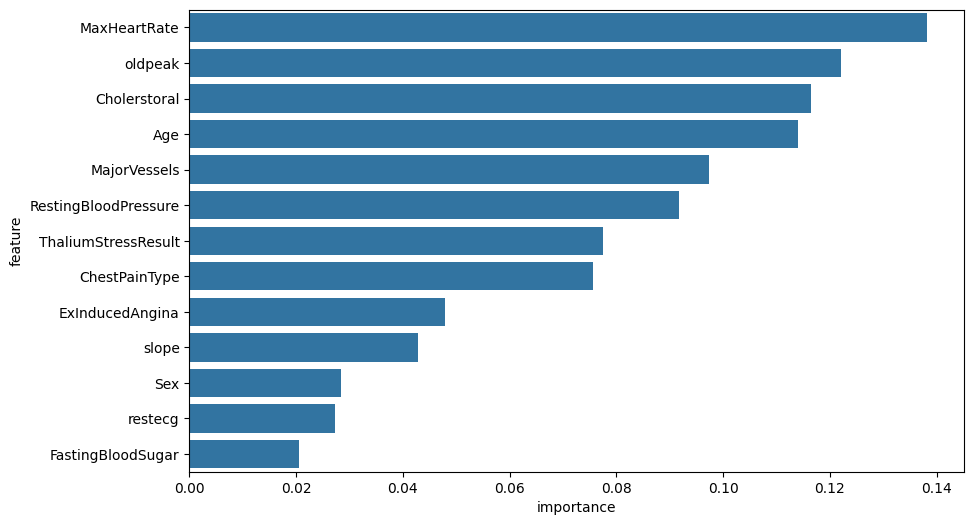

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.show()

In [85]:
lr = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=lr, n_features_to_select=8)
rfe.fit(X, y)

,estimator,LogisticRegre...ndom_state=42)
,n_features_to_select,8
,step,1
,verbose,0
,importance_getter,'auto'
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1


In [86]:
rfe_results = pd.DataFrame({'feature': X.columns, 'ranking': rfe.ranking_}).sort_values(by='ranking')
rfe_results

,feature,ranking
1,Sex,1
2,ChestPainType,1
6,restecg,1
5,FastingBloodSugar,1
11,MajorVessels,1
10,slope,1
9,oldpeak,1
8,ExInducedAngina,1
7,MaxHeartRate,2
12,ThaliumStressResult,3


In [87]:
selected_features_rfe = X.columns[rfe.support_]
selected_features_rfe

Index(['Sex', 'ChestPainType', 'FastingBloodSugar', 'restecg',
       'ExInducedAngina', 'oldpeak', 'slope', 'MajorVessels'],
      dtype='object')

In [88]:
categorical_features = ['Sex', 'ChestPainType', 'restecg', 'FastingBloodSugar', 'ExInducedAngina', 'slope', 'MajorVessels', 'ThaliumStressResult']
X_categorical = X[categorical_features].astype('int')

In [89]:
chi_scores = chi2(X_categorical, y)
chi2_results = pd.DataFrame({'feature': X_categorical.columns, 'chi2': chi_scores[0], 'p_value': chi_scores[1]}).sort_values(by='chi2', ascending=False)
chi2_results

,feature,chi2,p_value
6,MajorVessels,109.866875,7.769316e-23
7,ThaliumStressResult,70.294698,1.966875e-14
4,ExInducedAngina,41.534482,2.083076e-08
1,ChestPainType,16.881183,2.038435e-03
2,restecg,14.057550,7.113628e-03
5,slope,10.542204,3.222058e-02
0,Sex,7.499223,1.117436e-01
3,FastingBloodSugar,6.658223,1.550901e-01


In [90]:
selected_features = feature_importance_df.head(8)['feature'].tolist()
df = df[selected_features]
df['target'] = y
df.head()

,MaxHeartRate,oldpeak,Cholerstoral,Age,MajorVessels,RestingBloodPressure,ThaliumStressResult,ChestPainType,target
0,0.017197,1.087338,-0.264900,0.948726,0.0,0.757525,6.0,1.0,0
1,-1.821905,0.397182,0.760415,1.392002,3.0,1.611220,3.0,4.0,2
2,-0.902354,1.346147,-0.342283,1.392002,2.0,-0.665300,7.0,4.0,1
3,1.637359,2.122573,0.063974,-1.932564,0.0,-0.096170,3.0,3.0,0
4,0.980537,0.310912,-0.825922,-1.489288,0.0,-0.096170,3.0,2.0,0


In [91]:
df.to_csv('../data/heart_disease.csv', index=False)